In [75]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np

In [99]:
data

[]

In [127]:
all_df = []
data = glob.glob("outputs_*_reg/*large*/train.log")
N = []
for p in data:
    name = p.replace("outputs_","").replace("_cla","").split("/")[0]
    model = p.split("/")[1].split("-")[-1].split(".")[0]
    print(name,model)
    N.append(f"{model} - {name}")
    with open(p,"r") as ff:
        log = []
        for f in ff:
            if "Epoch" in f:
                if "avg_train_loss" in f:
                    _,epoch,_,_,t_loss,_,_,v_loss,_,_,_ = f.split(" ")
                    log.append([epoch,abs(float(t_loss)-float(v_loss))])
        #             log.append([epoch,float(t_loss),float(v_loss)])
        # df = pd.DataFrame(log,columns=['epoch',f'train_loss_{name}',f'valid_loss_{name}'])
        df = pd.DataFrame(log,columns=['epoch',f'valid_loss'])
        df=df.groupby("epoch").mean()
        all_df.append(df)

backtranslate_reg large
baseline_reg large
toxigen_backtranslate_reg large


In [128]:
d = pd.concat(all_df)

Text(0.5, 0, 'Epoch')

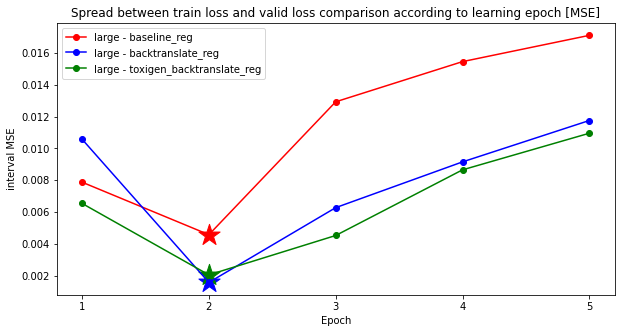

In [129]:
plt.figure(figsize=[10,5])
plt.plot(all_df[1]['valid_loss'],label = N[1],marker='o',color='red')
index = np.argmin(all_df[1].valid_loss)
score = np.min(all_df[1].valid_loss)
plt.scatter(index,score,marker='*',s=500,c='red')
plt.plot(all_df[0]['valid_loss'],label = N[0],marker='o',color='blue')
index = np.argmin(all_df[0].valid_loss)
score = np.min(all_df[0].valid_loss)
plt.scatter(index,score,marker='*',s=500,c='blue')
plt.plot(all_df[2]['valid_loss'],label = N[2],marker='o',color='green')
index = np.argmin(all_df[2].valid_loss)
score = np.min(all_df[2].valid_loss)
plt.scatter(index,score,marker='*',s=500,c='green')
plt.legend()
plt.title("Spread between train loss and valid loss comparison according to learning epoch [MSE]")
plt.ylabel("interval MSE")
plt.xlabel("Epoch")

<AxesSubplot:xlabel='epoch'>

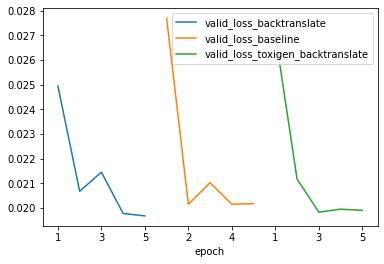

In [56]:
d.plot()

<AxesSubplot:xlabel='epoch'>

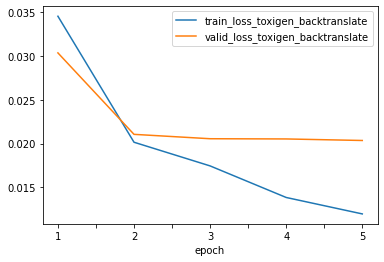

In [47]:
df.plot()

In [39]:
all_df[0]

,t_loss,v_loss
epoch,,
1,0.034550,0.023650
2,0.020975,0.021975
3,0.017600,0.021525
4,0.013450,0.020800
5,0.010800,0.020850
